In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, KFold
from sklearn import preprocessing as prep
from sklearn import utils
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor

In [4]:
dataset_url = '/content/drive/My Drive/coursera/Week 5/week_5_abalone.csv'
data = pd.read_csv(dataset_url)
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [0]:
 data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [6]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
X = data.drop(["Rings"], axis = 1)
y = data["Rings"]
X.shape, y.shape

((4177, 8), (4177,))

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [42]:
def get_cross_val_scores_clf_parametric(classifier, parameter_name, parameter_values, **kwargs):
    scores = {}
    params = {}
    params.update(kwargs)
    print("testing parameters:", kwargs)
    for test_value in parameter_values:
        params[parameter_name] = test_value
        clf  = classifier(**params)
        clf.fit(X, y)
        scores[test_value] = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits = 5, shuffle = True, random_state = 1), scoring='r2'))  # make_scorer(r2_score))
    return scores

parameter_name = 'n_estimators'
parameter_values = range(1, 51)
model_parameters = {'random_state':1}

result = get_cross_val_scores_clf_parametric(RandomForestRegressor, parameter_name, parameter_values, **model_parameters)



testing parameters: {'random_state': 1}


In [0]:
#result_mean = pd.DataFrame(map(np.mean, result.values()))
for k,v in result.items():
    print(k, v, round(v, 2))

In [39]:
result_mean.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.109675,0.3413,0.406434,0.444775,0.465032,0.471396,0.476666,0.482935,0.489437,0.495409,0.494411,0.499028,0.503058,0.507317,0.509181,0.511411,0.514892,0.51722,0.519829,0.519484,0.520529,0.520804,0.521743,0.523106,0.523249,0.524308,0.524639,0.525656,0.526556,0.527086,0.527642,0.528924,0.530107,0.529961,0.529821,0.52991,0.529432,0.529472,0.529516,0.52947,0.529809,0.530043,0.529914,0.529681,0.528908,0.529008,0.529179,0.530051,0.530813,0.530951


<Figure size 1296x720 with 0 Axes>

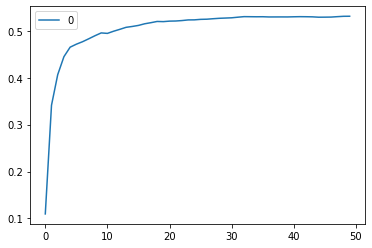

In [32]:
plt.figure(figsize=(18,10))
result_mean.plot()

In [38]:
result_mean[result_mean[0]>.52]

,0
20,0.520529
21,0.520804
22,0.521743
23,0.523106
24,0.523249
25,0.524308
26,0.524639
27,0.525656
28,0.526556
29,0.527086
